# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
#check the docstring for uniform()
# The size of xs and zs is observations by 1. In this case: 1000 x 1. SIze is actually the shape
#usually the appropriate size is 'number of observations'/'number of variables'. SO x is an individual variable and z is an individual variable
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
# so we end up with a 1000 by 2 matrix
inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
#we ultimately multiply the input matrix with the weights matrix. So multiplication rule of matrix has to be followed. Therefore care needs to be taken about the size
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)


(1000, 2)


## Elements of a model in Supervised learning
We have to take care of the following in supervised learning:
1.input
2.weights
3.bias
4.outputs
5.targets

Here we are trying to create our own ML model. Inputs and targets have to be generated by us. The weights,biases are varied through the algorithm and the outputs are the results from the model employed. So we leave these 3 for the computer

In [3]:
xs

array([[-4.31434992e+00],
       [-2.67029090e+00],
       [ 5.94919700e+00],
       [-4.31076582e+00],
       [ 3.64037231e+00],
       [-1.55156395e+00],
       [ 7.70920427e+00],
       [ 7.25328462e+00],
       [ 7.94067968e+00],
       [-7.43540305e+00],
       [ 9.35493927e+00],
       [-1.04548629e+00],
       [ 2.21835789e+00],
       [ 7.92786897e+00],
       [-2.14170271e+00],
       [-1.50015620e+00],
       [-8.99440756e+00],
       [-4.07286896e+00],
       [ 2.79304127e+00],
       [ 3.80207952e+00],
       [ 6.26630140e-01],
       [-5.64437317e+00],
       [-5.05658146e+00],
       [-7.66682786e+00],
       [ 6.69002252e-01],
       [-4.21628025e+00],
       [ 6.03223965e+00],
       [-2.57530074e+00],
       [ 3.13317702e+00],
       [-3.94716849e+00],
       [-6.80833110e+00],
       [ 1.46065057e+00],
       [-9.96430520e+00],
       [ 1.07691076e+00],
       [ 2.30080863e+00],
       [-4.25601187e+00],
       [ 6.74593721e+00],
       [-1.08436916e+00],
       [-8.3

### Generate the targets we will aim at

Assume that we only know about a linear model and we also know that a linear model is the base for all other models.
Assume that our targets are defined by a function f(x,z)=2x-3z+5+noise
We have randomly chosen this function. You can try choosing different functions
The weights are 2 and -3 and the bias is 5. Now thats the correct result. If we dont get this at the end,it means that we havent worked properly.
Noise is introduced just to randomize our dataset

In [4]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


So till now we have our input data as 1000 by 2 matrix(1000 by 1 for each input variable xs and zs), and we have the targets

### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

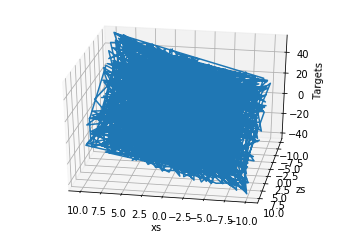

In [5]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

We know that ulimately the linear equation we follow is:
y=xw+b
Our algorithm will try to find such values for w and b so that the output(y) is closest to the target(t)
We will pick our inital weights and biases  randomly from the interval -0.1 to 0.1
Size for weights will be 2 by 1 matrix because there will be 2 weights, 1 each for xs and zs
Bias is scalar(1*1). Bias is equal to the number of outputs(output variables) we have. each output has its own bias

### Initialize variables

In [6]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[ 0.0196245 ]
 [-0.09927407]]
[0.04504025]


### Set a learning rate

In [7]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

### Train the model

In [8]:
#The problem ultimately boils down to minimizing the loss function wrt to weights and biases, so that our output is closest to the target
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# The proper number of iterations is something we will talk about later on, but generally
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.

#creating a loop which will apply our update rule and calculate the loss function
#At each iteration, we will calculate the outputs and compare them to the target through the loss function
#We wil print the loss for each iteration
#Finally we will adjust the weights and biases so as to get a better fit of the data
#So at the next iteration, the updated weights and bias will provide an updated output and the same procedure is repeated

for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    #inputs--1000 by 2, Weights-- 2 by 1 and scalar gets added to each element of the matrix
    
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    deltas = outputs - targets #deltas are part of the update rule
   
    
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    
    #Next we will calculate the loss which is half the L2-Norm loss. delta is a 1000 by 1 array
    #So we are interested in its sum of terms squared[L2-Norm formula--Summision((yi-ti)**2)]
    loss = np.sum(deltas ** 2) / 2 / observations
    #Dividing by number of observations gives us the Mean/Average loss per observation
    #Note that the same learning rate must give us similar results for both 1000 or 1million observations
    
    # We print the loss function value at each step so we can observe whether it is decreasing as the iterations are being performed.
    print (loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    
    #UPdating the delta for the next iteration
    deltas_scaled = deltas / observations
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    
    #Updating the weights and bias for the next iteration
    #W(i+1)=W(i)-Eta[Summission[x(i).delta(i)]]
    #shape of weights--2 by 1
    #shape of inputs--1000 by 2
    #shape of deltas--1000 by 1
    #learning rate is a scalar
    #So as per the matrix multiplication rule we cannot multiply inputs with deltas_scaled.
    #That is the reason why we are taking a Transpose of inputs(inputs.T).
    #So 2 by 1000 matrix(inputs.T) can be multiplied with 1000 by 1(deltas_scaled)
    #So we have updated the weights and biases using the Gradient descent methodology
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 
    
    #Observe the output for the loss function. It keeps on decreasing, until it reaches a point where it almost stops changing
    #This means that we have found a linear function that fits the model well

238.94029728529634
34.83288040087247
14.21389788050576
11.755477693854125
11.109407267270281
10.658484495544016
10.242162000075487
9.843958416902696
9.461662765778238
9.09449827631265
8.741852083908332
8.403148728305124
8.07783680435514
7.765386836866719
7.465290297417487
7.177058764686975
6.900223128339456
6.634332825407324
6.378955106967102
6.133674333819147
5.8980913000152775
5.671822583132367
5.454499920234404
5.245769608507299
5.045291929590987
4.852740596671899
4.667802223435873
4.490175814017248
4.3195722731139945
4.155713935471576
3.9983341139697277
3.847176665576687
3.7019955744644037
3.5625545516062562
3.428626650205595
3.2999938963291964
3.176446934144479
3.0577846851830746
2.9438140210762107
2.8343494492292303
2.7292128109237153
2.6282329913558256
2.531245641138929
2.4380929088172953
2.348623183955441
2.26269085038505
2.180156049207841
2.100884451168651
2.0247470380282873
1.9516198925802994
1.881383996969915
1.8139250389869122
1.7491332260171388
1.6869031063498905
1.6271333

### Print weights and biases and see if we have worked correctly.

In [9]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be convergING. So more iterations are needed.
#the output will be closest to the target with this model, because as per the original equation:
#2x-3z+5, the weights and bias we obtain is equivalent to 2,-3 and 5

[[ 1.99977581]
 [-2.9958843 ]] [4.33131652]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

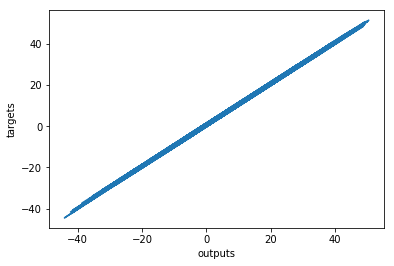

In [10]:
# We print the outputs and the targets in order to see if they have a linear relationship.
# Again, that's not needed. Moreover, in later lectures, that would not even be possible.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()